Annual to monthly conversion

In [ ]:
import os
import xarray as xr

# === Paths ===
input_folder = r"Data - Modelling\Annual_DB\2. QLD_Cropped\Min Temp"  # Change for each variable
output_folder = r"Data - Modelling\Monthly_DB\Variables\Min Temp"
os.makedirs(output_folder, exist_ok=True)

# === List .nc files ===
nc_files = [f for f in os.listdir(input_folder) if f.endswith(".nc")]

# === Process each file ===
for nc_file in nc_files:
    nc_path = os.path.join(input_folder, nc_file)
    print(f"\n📂 Processing: {nc_file}")

    try:
        # === Load the QLD-cropped file ===
        ds = xr.open_dataset(nc_path)
        
        # === Ensure lat, lon, region_code are preserved ===
        coords_to_keep = ["lat", "lon", "region_code"] if "region_code" in ds else ["lat", "lon"]
        numeric_vars = [var for var in ds.data_vars if ds[var].dtype in ["float32", "float64", "int32", "int64"]]

        # === Convert numeric variables to monthly average ===
        ds_monthly = ds[numeric_vars].resample(time="MS").mean()  # 'MS' is monthly start
        
        # === Preserve non-averaged coordinates and region_code ===
        for coord in coords_to_keep:
            if coord in ds:
                ds_monthly[coord] = ds[coord]

        # === Save monthly-averaged file ===
        output_path = os.path.join(output_folder, f"Monthly_{nc_file}")
        ds_monthly.to_netcdf(output_path)
        print(f"✅ Saved monthly average file: {output_path}")

    except Exception as e:
        print(f"❌ Failed for {nc_file}: {e}")


In [27]:
ds = xr.open_dataset("Data - Modelling\Monthly_DB\Variables\Rainfall\Monthly_QLD_2000.monthly_rain.nc")
print(ds)

<>:1: SyntaxWarning:

invalid escape sequence '\M'

<>:1: SyntaxWarning:

invalid escape sequence '\M'

C:\Users\Jspch\AppData\Local\Temp\ipykernel_24176\2687556570.py:1: SyntaxWarning:

invalid escape sequence '\M'



<xarray.Dataset> Size: 12MB
Dimensions:       (time: 12, lat: 382, lon: 311)
Coordinates:
  * lat           (lat) float64 3kB -29.15 -29.1 -29.05 ... -10.2 -10.15 -10.1
  * lon           (lon) float64 2kB 138.0 138.1 138.1 ... 153.4 153.4 153.5
  * time          (time) datetime64[ns] 96B 2000-01-01 2000-02-01 ... 2000-12-01
Data variables:
    spatial_ref   (time) float64 96B ...
    monthly_rain  (time, lat, lon) float64 11MB ...
    region_code   (lat, lon) int16 238kB ...
Attributes:
    department:               Department of Environment and Science
    department_short:         DES
    copyright:                Copyright - the State of Queensland Department ...
    site_url:                 http://www.longpaddock.qld.gov.au
    institution:              Queensland Government, Department of Environmen...
    raster_source:            Gridded surface was created by interpolating ob...
    raster_source_additions:  and other suppliers (see the SILO webpage for d...
    metadata_url: 

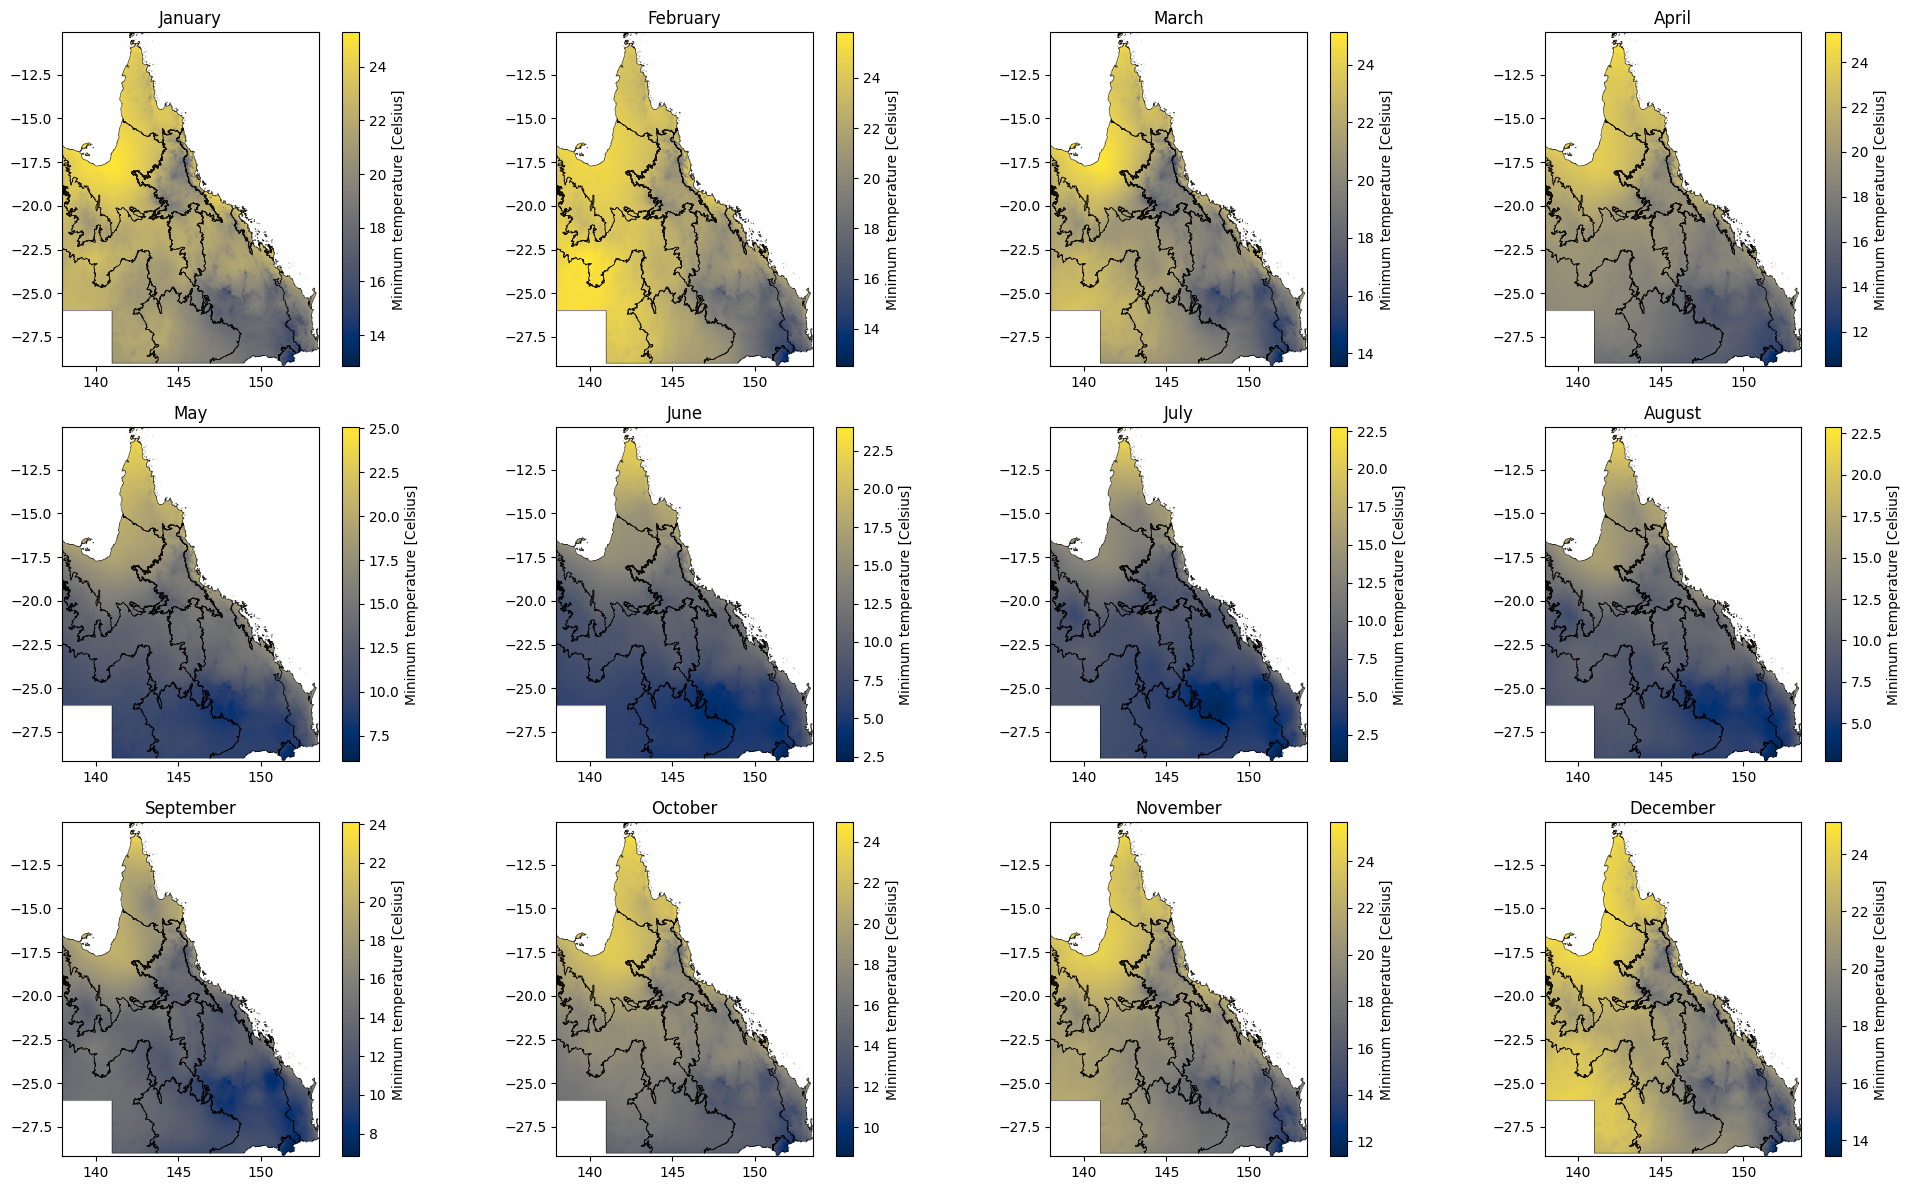

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# === Load the shapefile for Queensland regions ===
shapefile_path = r'Data\QLD Bio Regions\QLD_BioRegion_Shape_Files\Biogeographic_Regions.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Open the monthly max temperature data for QLD ===
ds = xr.open_dataset(r'Data - Modelling\Monthly_DB\Variables\Min Temp\Monthly_QLD_2000.min_temp.nc')
monthly_rain = ds['min_temp']  # Adjust variable name as needed

# === Create figure and axes for the plot ===
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

# === Plot each month with its own colorbar ===
for i, month in enumerate(monthly_rain.time):
    ax = axes[i]
    data = monthly_rain.sel(time=month)
    
    # Plot with individual colorbar
    data.plot(ax=ax, cmap='cividis', add_colorbar=True)
    
    # Overlay region boundaries
    qld_shape.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.7)
    
    # Set the title
    ax.set_title(month.dt.strftime('%B').item())
    ax.set_xlabel('')
    ax.set_ylabel('')

# === Remove unused axes if any ===
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# === Final layout ===
plt.tight_layout()
plt.show()


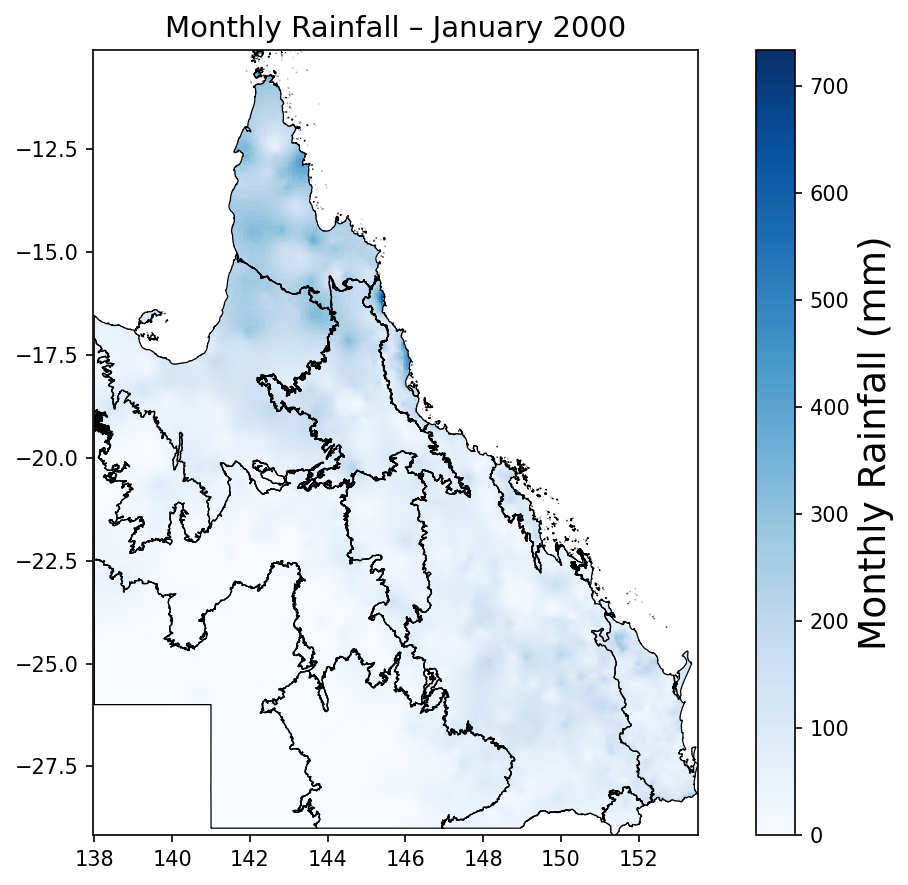

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# === Load the shapefile for Queensland regions ===
shapefile_path = r'Data\QLD Bio Regions\QLD_BioRegion_Shape_Files\Biogeographic_Regions.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Open the monthly rainfall data for QLD ===
ds = xr.open_dataset(r'Data - Modelling\Monthly_DB\Variables\Rainfall\Monthly_QLD_2000.monthly_rain.nc')
monthly_rain = ds['monthly_rain']

# ✅ Select ONE month
month_data = monthly_rain.isel(time=0)
month_label = month_data.time.dt.strftime('%B %Y').item()

# Create figure
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)

# Plot selected month
img = month_data.plot(ax=ax, cmap='Blues', add_colorbar=True)

# ✅ Increase ONLY colorbar label font
cbar = img.colorbar
cbar.set_label("Monthly Rainfall (mm)", fontsize=18)

# Overlay QLD boundaries
qld_shape.boundary.plot(ax=ax, color='black', linewidth=0.6)

# Titles
ax.set_title(f"Monthly Rainfall – {month_label}", fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show()


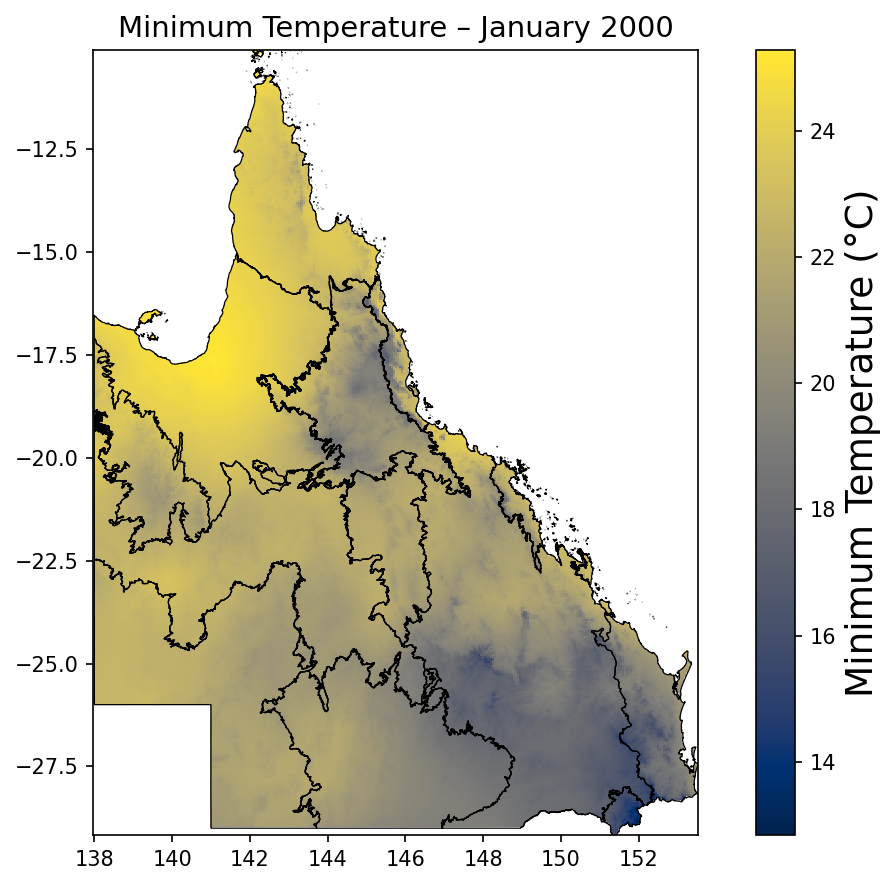

In [34]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# === Load the shapefile for Queensland regions ===
shapefile_path = r'Data\QLD Bio Regions\QLD_BioRegion_Shape_Files\Biogeographic_Regions.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Open the monthly min temperature data for QLD ===
ds = xr.open_dataset(r'Data - Modelling\Monthly_DB\Variables\Min Temp\Monthly_QLD_2000.min_temp.nc')
monthly_min_temp = ds['min_temp']

# ✅ Select ONE month
month_data = monthly_min_temp.isel(time=0)
month_label = month_data.time.dt.strftime('%B %Y').item()

# Create figure
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)

# Plot selected month
img = month_data.plot(ax=ax, cmap='cividis', add_colorbar=True)

# ✅ Increase ONLY colorbar label font
cbar = img.colorbar
cbar.set_label("Minimum Temperature (°C)", fontsize=18)

# Overlay QLD boundaries
qld_shape.boundary.plot(ax=ax, color='black', linewidth=0.6)

# Titles
ax.set_title(f"Minimum Temperature – {month_label}", fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show()


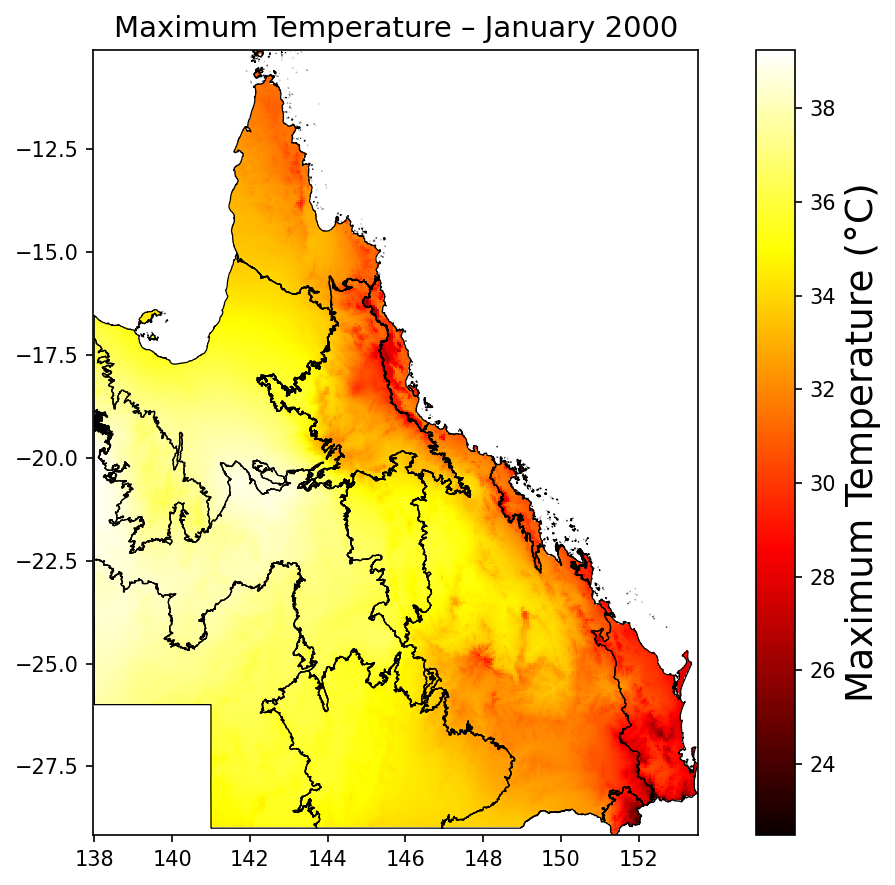

In [32]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# === Load the shapefile for Queensland regions ===
shapefile_path = r'Data\QLD Bio Regions\QLD_BioRegion_Shape_Files\Biogeographic_Regions.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Open the monthly max temperature data for QLD ===
ds = xr.open_dataset(r'Data - Modelling\Monthly_DB\Variables\Max Temp\Monthly_QLD_2000.max_temp.nc')
monthly_max_temp = ds['max_temp']

# ✅ Select ONE month
month_data = monthly_max_temp.isel(time=0)
month_label = month_data.time.dt.strftime('%B %Y').item()

# Create figure
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)

# Plot selected month
img = month_data.plot(ax=ax, cmap='hot', add_colorbar=True)

# ✅ Increase ONLY colorbar label font (variable name)
cbar = img.colorbar
cbar.set_label("Maximum Temperature (°C)", fontsize=18)   # <--- ONLY this increased

# Overlay QLD boundaries
qld_shape.boundary.plot(ax=ax, color='black', linewidth=0.6)

# Titles (unchanged)
ax.set_title(f"Maximum Temperature – {month_label}", fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show()


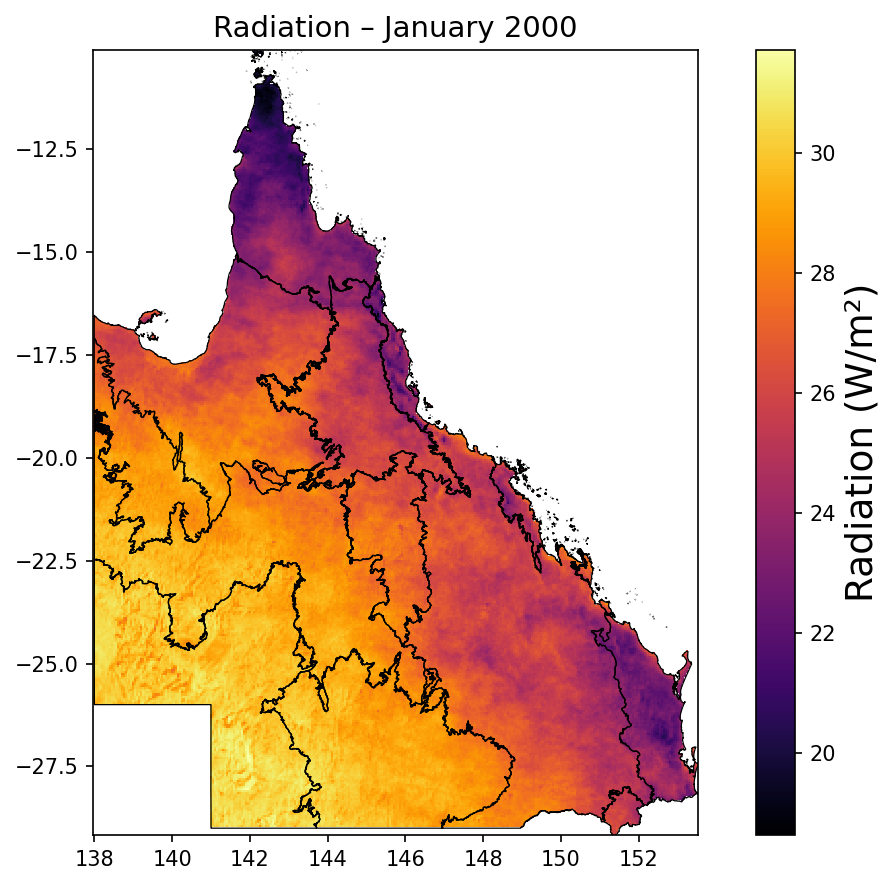

In [35]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# === Load the shapefile for Queensland regions ===
shapefile_path = r'Data\QLD Bio Regions\QLD_BioRegion_Shape_Files\Biogeographic_Regions.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Open the monthly radiation data for QLD ===
ds = xr.open_dataset(r'Data - Modelling\Monthly_DB\Variables\Radiation\Monthly_QLD_2000.radiation.nc')
monthly_rad = ds['radiation']

# ✅ Select ONE month
month_data = monthly_rad.isel(time=0)
month_label = month_data.time.dt.strftime('%B %Y').item()

# Create figure
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)

# Plot selected month
img = month_data.plot(ax=ax, cmap='inferno', add_colorbar=True)

# ✅ Increase ONLY colorbar label font
cbar = img.colorbar
cbar.set_label("Radiation (W/m²)", fontsize=18)

# Overlay QLD boundaries
qld_shape.boundary.plot(ax=ax, color='black', linewidth=0.6)

# Correct Title
ax.set_title(f"Radiation – {month_label}", fontsize=14)

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show()


SPI Generation from Rainfall data

In [1]:
import xarray as xr
import numpy as np
import os
from scipy.stats import gamma, norm
from tqdm import tqdm

# === Paths ===
input_dir = "Data - Modelling\\Monthly_DB\\Variables\\Rainfall"
output_dir = "Data - Modelling\\Monthly_DB\\Variables\\SPI"
os.makedirs(output_dir, exist_ok=True)

def calculate_spi_1(rain_ts):
    """Calculate SPI-1 for a 1D time series of rainfall."""
    if np.isnan(rain_ts).any() or np.all(rain_ts <= 0):
        return np.full_like(rain_ts, np.nan)

    rain_ts = np.where(rain_ts <= 0, 0.1, rain_ts)
    try:
        shape, loc, scale = gamma.fit(rain_ts, floc=0)
        cdf_vals = gamma.cdf(rain_ts, shape, loc=loc, scale=scale)
        spi_vals = norm.ppf(cdf_vals)
        return spi_vals
    except:
        return np.full_like(rain_ts, np.nan)

# === Process Each File ===
for file in tqdm(sorted(os.listdir(input_dir))):
    if not file.endswith(".nc"):
        continue

    print(f"\n📂 Processing: {file}")
    ds = xr.open_dataset(os.path.join(input_dir, file))
    rain = ds['monthly_rain'].values

    # === Preserve coordinates and region_code ===
    time, lat, lon = rain.shape
    spi_vals = np.full((time, lat, lon), np.nan)
    region_code = ds['region_code'] if 'region_code' in ds else None

    for i in range(lat):
        for j in range(lon):
            rain_ts = rain[:, i, j]
            spi = calculate_spi_1(rain_ts)
            spi_vals[:, i, j] = spi

    # === Save SPI file while preserving coordinates ===
    spi_ds = xr.Dataset({
        'spi_1': (['time', 'lat', 'lon'], spi_vals),
    }, coords={
        'time': ds.time,
        'lat': ds.lat,
        'lon': ds.lon
    })

    # === Preserve region_code if it exists ===
    if region_code is not None:
        spi_ds['region_code'] = ds['region_code']

    # === Save the SPI NetCDF file using a unique filename ===
    output_filename = f"SPI_{file}"
    out_path = os.path.join(output_dir, output_filename)
    spi_ds.to_netcdf(out_path)
    print(f"✅ Saved: {out_path}")


  0%|          | 0/25 [00:00<?, ?it/s]


📂 Processing: Monthly_QLD_2000.monthly_rain.nc


  4%|▍         | 1/25 [00:12<04:54, 12.25s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2000.monthly_rain.nc

📂 Processing: Monthly_QLD_2001.monthly_rain.nc


  8%|▊         | 2/25 [00:24<04:47, 12.48s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2001.monthly_rain.nc

📂 Processing: Monthly_QLD_2002.monthly_rain.nc


 12%|█▏        | 3/25 [00:37<04:36, 12.59s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2002.monthly_rain.nc

📂 Processing: Monthly_QLD_2003.monthly_rain.nc


 16%|█▌        | 4/25 [00:51<04:37, 13.21s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2003.monthly_rain.nc

📂 Processing: Monthly_QLD_2004.monthly_rain.nc


 20%|██        | 5/25 [01:05<04:27, 13.35s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2004.monthly_rain.nc

📂 Processing: Monthly_QLD_2005.monthly_rain.nc


 24%|██▍       | 6/25 [01:18<04:11, 13.23s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2005.monthly_rain.nc

📂 Processing: Monthly_QLD_2006.monthly_rain.nc


 28%|██▊       | 7/25 [01:31<03:56, 13.15s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2006.monthly_rain.nc

📂 Processing: Monthly_QLD_2007.monthly_rain.nc


 32%|███▏      | 8/25 [01:44<03:44, 13.21s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2007.monthly_rain.nc

📂 Processing: Monthly_QLD_2008.monthly_rain.nc


 36%|███▌      | 9/25 [01:57<03:29, 13.10s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2008.monthly_rain.nc

📂 Processing: Monthly_QLD_2009.monthly_rain.nc


 40%|████      | 10/25 [02:10<03:15, 13.03s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2009.monthly_rain.nc

📂 Processing: Monthly_QLD_2010.monthly_rain.nc


 44%|████▍     | 11/25 [02:23<03:01, 12.99s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2010.monthly_rain.nc

📂 Processing: Monthly_QLD_2011.monthly_rain.nc


 48%|████▊     | 12/25 [02:36<02:47, 12.92s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2011.monthly_rain.nc

📂 Processing: Monthly_QLD_2012.monthly_rain.nc


 52%|█████▏    | 13/25 [02:48<02:34, 12.90s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2012.monthly_rain.nc

📂 Processing: Monthly_QLD_2013.monthly_rain.nc


 56%|█████▌    | 14/25 [03:01<02:21, 12.90s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2013.monthly_rain.nc

📂 Processing: Monthly_QLD_2014.monthly_rain.nc


 60%|██████    | 15/25 [03:14<02:08, 12.88s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2014.monthly_rain.nc

📂 Processing: Monthly_QLD_2015.monthly_rain.nc


 64%|██████▍   | 16/25 [03:27<01:55, 12.87s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2015.monthly_rain.nc

📂 Processing: Monthly_QLD_2016.monthly_rain.nc


 68%|██████▊   | 17/25 [03:40<01:43, 12.91s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2016.monthly_rain.nc

📂 Processing: Monthly_QLD_2017.monthly_rain.nc


 72%|███████▏  | 18/25 [03:53<01:30, 12.87s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2017.monthly_rain.nc

📂 Processing: Monthly_QLD_2018.monthly_rain.nc


 76%|███████▌  | 19/25 [04:06<01:17, 12.95s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2018.monthly_rain.nc

📂 Processing: Monthly_QLD_2019.monthly_rain.nc


 80%|████████  | 20/25 [04:19<01:04, 12.90s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2019.monthly_rain.nc

📂 Processing: Monthly_QLD_2020.monthly_rain.nc


 84%|████████▍ | 21/25 [04:32<00:51, 12.88s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2020.monthly_rain.nc

📂 Processing: Monthly_QLD_2021.monthly_rain.nc


 88%|████████▊ | 22/25 [04:44<00:38, 12.85s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2021.monthly_rain.nc

📂 Processing: Monthly_QLD_2022.monthly_rain.nc


 92%|█████████▏| 23/25 [04:57<00:25, 12.83s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2022.monthly_rain.nc

📂 Processing: Monthly_QLD_2023.monthly_rain.nc


 96%|█████████▌| 24/25 [05:10<00:12, 12.97s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2023.monthly_rain.nc

📂 Processing: Monthly_QLD_2024.monthly_rain.nc


100%|██████████| 25/25 [05:23<00:00, 12.95s/it]

✅ Saved: Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2024.monthly_rain.nc


In [2]:
ds = xr.open_dataset(r"Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2000.monthly_rain.nc")
print(ds)

<xarray.Dataset> Size: 12MB
Dimensions:      (time: 12, lat: 382, lon: 311)
Coordinates:
  * time         (time) datetime64[ns] 96B 2000-01-01 2000-02-01 ... 2000-12-01
  * lat          (lat) float64 3kB -29.15 -29.1 -29.05 ... -10.2 -10.15 -10.1
  * lon          (lon) float64 2kB 138.0 138.1 138.1 138.2 ... 153.4 153.4 153.5
Data variables:
    spi_1        (time, lat, lon) float64 11MB ...
    region_code  (lat, lon) int16 238kB ...


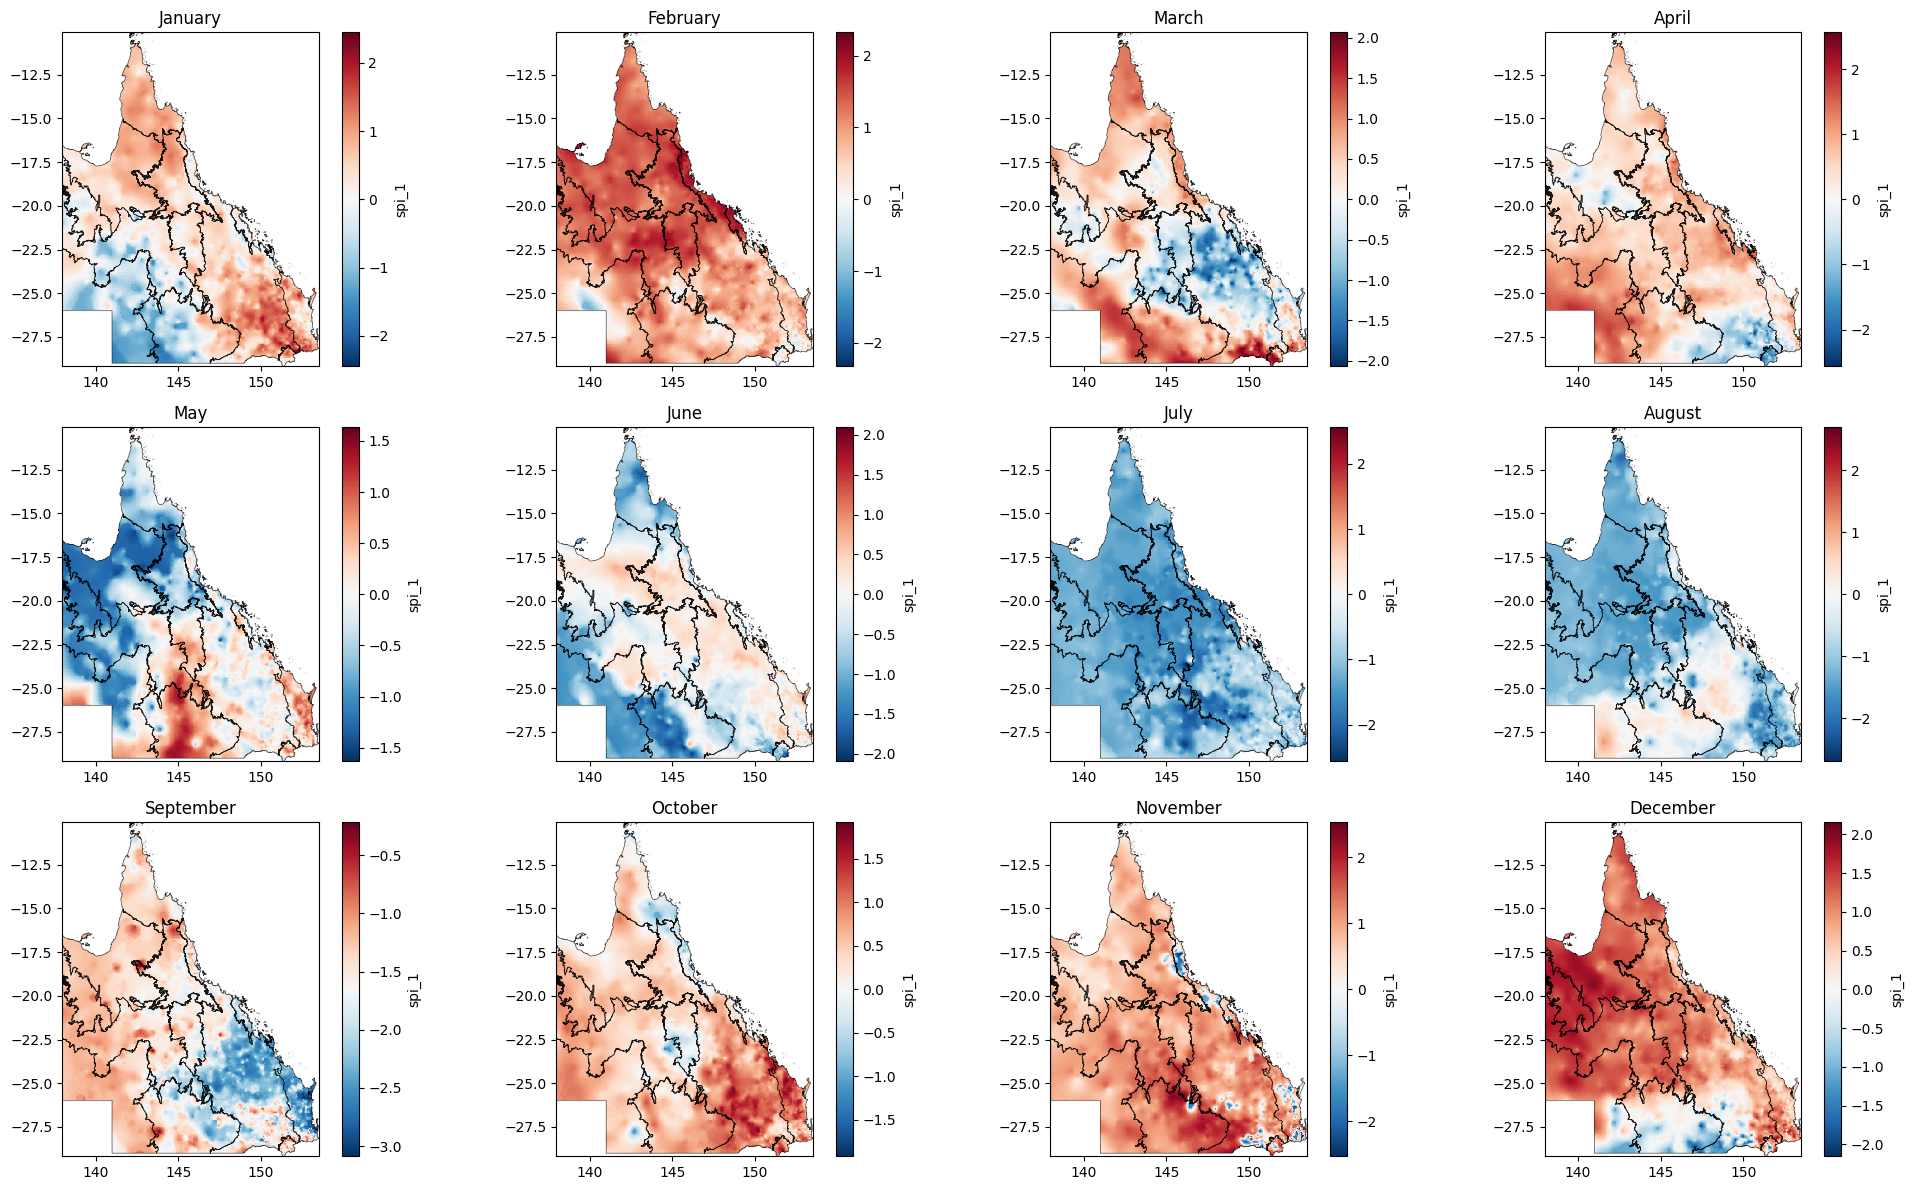

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# === Load the shapefile for Queensland regions ===
shapefile_path = r'Data\QLD Bio Regions\QLD_BioRegion_Shape_Files\Biogeographic_Regions.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Open the monthly max temperature data for QLD ===
ds = xr.open_dataset(r'Data - Modelling\Monthly_DB\Variables\SPI\SPI_Monthly_QLD_2000.monthly_rain.nc')
monthly_rain = ds['spi_1']  # Adjust variable name as needed

# === Create figure and axes for the plot ===
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

# === Plot each month with its own colorbar ===
for i, month in enumerate(monthly_rain.time):
    ax = axes[i]
    data = monthly_rain.sel(time=month)
    
    # Plot with individual colorbar
    data.plot(ax=ax, cmap='RdBu_r', add_colorbar=True)
    
    # Overlay region boundaries
    qld_shape.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.7)
    
    # Set the title
    ax.set_title(month.dt.strftime('%B').item())
    ax.set_xlabel('')
    ax.set_ylabel('')

# === Remove unused axes if any ===
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# === Final layout ===
plt.tight_layout()
plt.show()
